# Programming assignment 1

In [6]:
import numpy as np
import requests
from io import BytesIO
from zipfile import ZipFile
from scipy.io import loadmat

from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
zipquiz = ("http://spark-public.s3.amazonaws.com"
           "/neuralnets/Programming%20Assignments"
           "/Programming%20Assignment%201/Assignment1.zip")
quiz_req = requests.get(zipquiz)
zipped = ZipFile(BytesIO(quiz_req.content))
zipped.extractall(path="./quiz6/")

** Datasets **
 1. `neg_example_nobias`: Matrix containing examples belonging to class 0
 2. `pos_example_nobias`: Matrix containing examples belloinging to class 1
 3. `w_init`: Some initial weight vector
 4. `w_gen_feas`: A generously feasible weight vector

In [5]:
dataset1 = loadmat("./quiz6/Datasets/dataset1.mat")
dataset1

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, written by Octave 3.2.4, 2012-10-03 23:31:57 UTC',
 '__version__': '1.0',
 'neg_examples_nobias': array([[-0.80857143,  0.8372093 ],
        [ 0.35714286,  0.85049834],
        [-0.75142857, -0.73089701],
        [-0.3       ,  0.12624585]]),
 'pos_examples_nobias': array([[ 0.87142857,  0.62458472],
        [-0.02      , -0.92358804],
        [ 0.36285714, -0.31893688],
        [ 0.88857143, -0.87043189]]),
 'w_gen_feas': array([[ 4.3496526 ],
        [-2.60997235],
        [-0.69414749]]),
 'w_init': array([[-0.62170147],
        [ 0.76091527],
        [ 0.77187205]])}

<IPython.core.display.Javascript object>


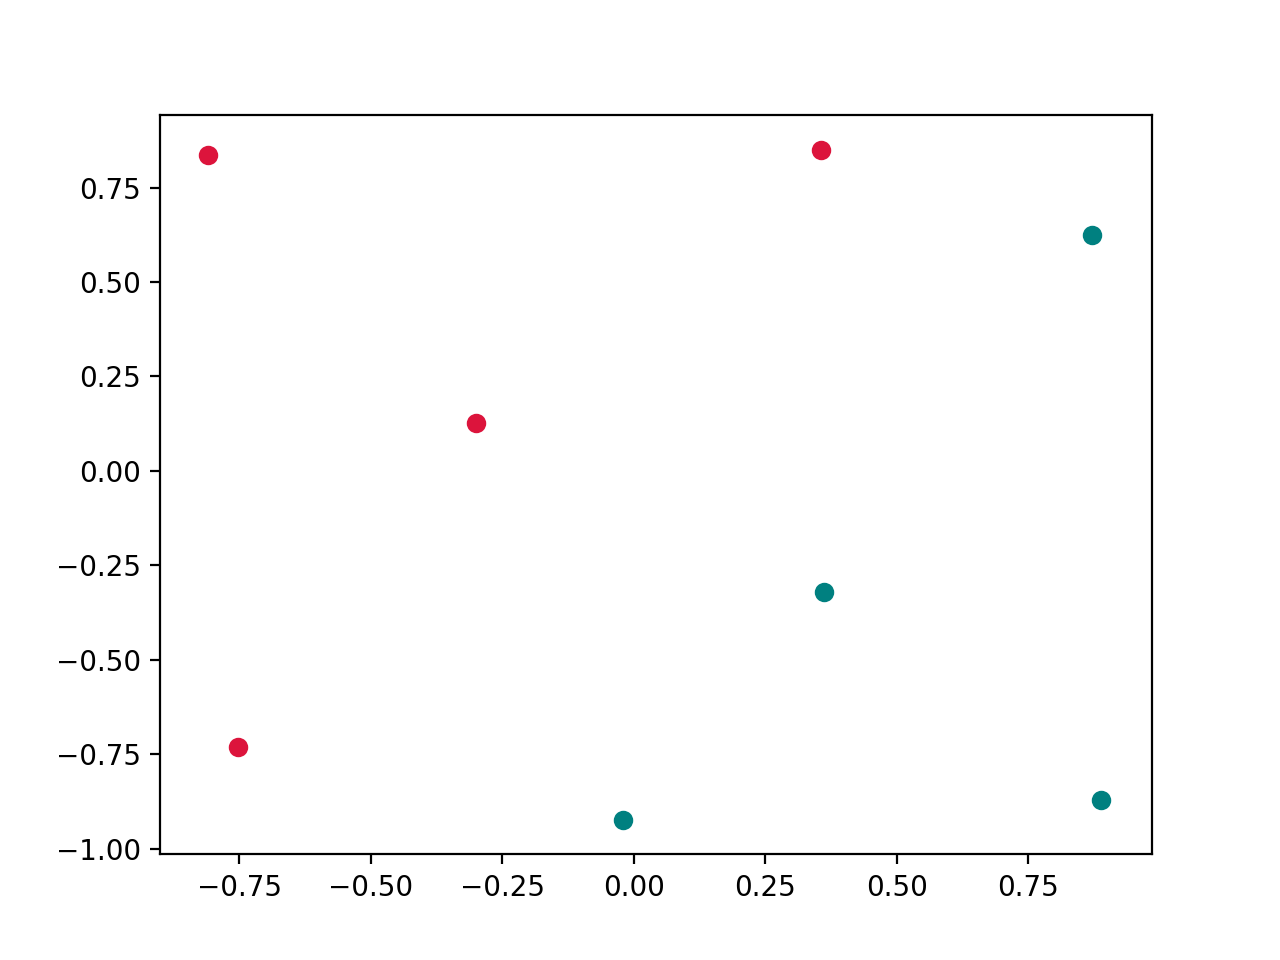

In [25]:
for neg, pos in zip(dataset1["neg_examples_nobias"], dataset1["pos_examples_nobias"]):
    plt.scatter(neg[0], neg[1], c="crimson")
    plt.scatter(pos[0], pos[1], c="teal")

In [31]:
ne = len(dataset1["neg_examples_nobias"])

In [44]:
np.c_[dataset1["neg_examples_nobias"],np.ones(ne)]

array([[-0.80857143,  0.8372093 ,  1.        ],
       [ 0.35714286,  0.85049834,  1.        ],
       [-0.75142857, -0.73089701,  1.        ],
       [-0.3       ,  0.12624585,  1.        ]])

In [34]:
dataset1["neg_examples_nobias"]

array([[-0.80857143,  0.8372093 ],
       [ 0.35714286,  0.85049834],
       [-0.75142857, -0.73089701],
       [-0.3       ,  0.12624585]])